In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [ ]:
# portfolio of sector ETFs and their names
ticker_sector_map = {
    "XLC": "Communication Services",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "XLK": "Technology",
    "XLU": "Utilities",
}

tickers = list(ticker_sector_map.keys())
sector_labels = {ticker: f"{ticker} - {name}" for ticker, name in ticker_sector_map.items()}

In [ ]:
start_date = "2023-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")

# Download historical data from yf API
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# download data to csv, filename have tickers joined by underscore and end_date
data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

In [ ]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Forward fill missing values for each column
df = df.fillna(method='ffill')

# Convert all values to float
df = df.astype(float)

# set index as datetime
df.index = pd.to_datetime(df.index)

# keep only level 1 'Close' prices
df = df.xs('Close', level=1, axis=1)

# use descriptive names in charts/legends
df = df.rename(columns=sector_labels)

# rename tickers to more readable names
df.columns = pd.MultiIndex.from_tuples([
    (
        col[0].replace('BNB-USD', 'BNB')
        .replace('ETH-USD', 'ETH')
        .replace('BTC-USD', 'BTC')
        .replace('DOGE-USD', 'DOGE')
        .replace('LINK-USD', 'LINK')
        .replace('SOL-USD', 'SOL')
        .replace('ADA-USD', 'ADA')
        .replace('XRP-USD', 'XRP')
        .replace('LTC-USD', 'LTC')
        .replace('CRO-USD', 'CRO')
        .replace('PENGU34466-USD', 'PENGU')
        .replace('DOOD-USD', 'DOOD')
        .replace('CAKE-USD', 'CAKE')
        .replace('PEPE24478-USD', 'PEPE'),
        col[1]
    ) for col in df.columns
])

df.head()

In [5]:
# keep only 'Close' from MultiIndex Level 1
close_prices = df.xs('Close', level=1, axis=1)

# date index to datetime
close_prices.index = pd.to_datetime(close_prices.index)

# Show the result
close_prices.head()


,DOOD,PEPE,PENGU,SOL,ADA,CRO,CAKE,DOGE,XRP,BTC,LTC,LINK,BNB,ETH
Date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,0.033458,0.033973,NaN,0.002033,0.192667,7200.174316,42.017719,1.806640,13.689083,130.802002
2020-01-02,NaN,NaN,NaN,NaN,0.032751,0.032858,NaN,0.002009,0.188043,6985.470215,39.823013,1.741144,13.027011,127.410179
2020-01-03,NaN,NaN,NaN,NaN,0.034180,0.034666,NaN,0.002145,0.193521,7344.884277,42.415573,1.809708,13.660452,134.171707
2020-01-04,NaN,NaN,NaN,NaN,0.034595,0.034689,NaN,0.002241,0.194355,7410.656738,43.326607,1.840133,13.891512,135.069366
2020-01-05,NaN,NaN,NaN,NaN,0.034721,0.034618,NaN,0.002419,0.195537,7411.317383,43.553207,1.807787,14.111019,136.276779


In [6]:
# crypto ratios list
ratios_list = ['ETH/BTC', 'BNB/BTC', 'DOGE/BTC', 
               'SOL/BTC', 'ADA/BTC', 'XRP/BTC', 
               'LTC/BTC', 'CRO/BTC', 'LINK/BTC', 
               'SOL/ETH', 'LINK/ETH', 'CAKE/BNB',
               'PENGU/SOL', 'DOOD/SOL', 'DOOD/PENGU',
               'BNB/ETH', 'PEPE/BTC', 'PEPE/ETH', 'PEPE/LINK',
               'ETH/PENGU', 'BTC/PENGU'
               ]

# ratios_list = ['PYTH/BTC', 'PYTH/ETH', 'SEI/BTC', 'SEI/ETH', 'ATOM/BTC', 'ATOM/ETH', 'ASTR/BTC', 'ASTR/ETH']

In [7]:
# create ratios DataFrame
ratios_df = pd.DataFrame(index=close_prices.index)

# Calculate the price ratios for each pair in the ratios list
for pair in ratios_list:
    base, quote = pair.split('/')
    ratios_df[pair] = close_prices[base] / close_prices[quote]

# fill any NaN values with 0 (zero)
"""
Although this is not the proper solution, it is a quick fix to avoid issues with NaN values, 
especially for SOL, that is more recent than the other cryptos.
"""
ratios_df = ratios_df.fillna(0)

# Show the result
ratios_df.tail()

,ETH/BTC,BNB/BTC,DOGE/BTC,SOL/BTC,ADA/BTC,XRP/BTC,LTC/BTC,CRO/BTC,LINK/BTC,SOL/ETH,...,CAKE/BNB,PENGU/SOL,DOOD/SOL,DOOD/PENGU,BNB/ETH,PEPE/BTC,PEPE/ETH,PEPE/LINK,ETH/PENGU,BTC/PENGU
Date,,,,,,,,,,,,,,,,,,,,,
2025-12-04,0.034016,0.009768,0.000002,0.001509,0.000005,0.000023,0.000907,0.000001,0.000155,0.044352,...,0.002608,0.000084,0.000032,0.379372,0.287165,5.426429e-11,1.595244e-09,3.507782e-07,268717.105190,7.899659e+06
2025-12-05,0.033835,0.009892,0.000002,0.001492,0.000005,0.000023,0.000900,0.000001,0.000152,0.044082,...,0.002578,0.000080,0.000034,0.420949,0.292358,4.474886e-11,1.322562e-09,2.939638e-07,283611.478942,8.382198e+06
2025-12-06,0.034055,0.009976,0.000002,0.001483,0.000005,0.000023,0.000915,0.000001,0.000156,0.043533,...,0.002539,0.000084,0.000037,0.438081,0.292922,5.600837e-11,1.644624e-09,3.590388e-07,274610.034822,8.063623e+06
2025-12-07,0.033862,0.009889,0.000002,0.001461,0.000005,0.000023,0.000901,0.000001,0.000151,0.043149,...,0.002504,0.000083,0.000039,0.466557,0.292040,4.424503e-11,1.306634e-09,2.931925e-07,278959.513374,8.238166e+06
2025-12-08,0.034479,0.009903,0.000002,0.001470,0.000005,0.000023,0.000926,0.000001,0.000152,0.042646,...,0.002583,0.000086,0.000038,0.441351,0.287215,5.516316e-11,1.599899e-09,3.636791e-07,272752.483171,7.910648e+06


In [8]:
# plot ratios for each pair in the ratios list using subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate number of rows and columns for subplots
n_ratios = len(ratios_list)
n_cols = 3  # 3 columns
n_rows = (n_ratios + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=[f'{ratio}' for ratio in ratios_list],
    vertical_spacing=0.08,
    horizontal_spacing=0.05
)

# Add each ratio as a separate subplot
for i, ratio in enumerate(ratios_list):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1
    
    fig.add_trace(
        go.Scatter(
            x=ratios_df.index,
            y=ratios_df[ratio],
            mode='lines',
            name=ratio,
            line=dict(width=2),
            showlegend=False
        ),
        row=row, col=col
    )
    
    # Update y-axis title for each subplot
    fig.update_yaxes(title_text="Ratio", row=row, col=col)
    fig.update_xaxes(title_text="Date", row=row, col=col)

# Update layout
fig.update_layout(
    title_text="Cryptocurrency Ratios - Individual Analysis",
    title_x=0.5,
    height=300 * n_rows,  # Adjust height based on number of rows
    showlegend=False
)

fig.show()

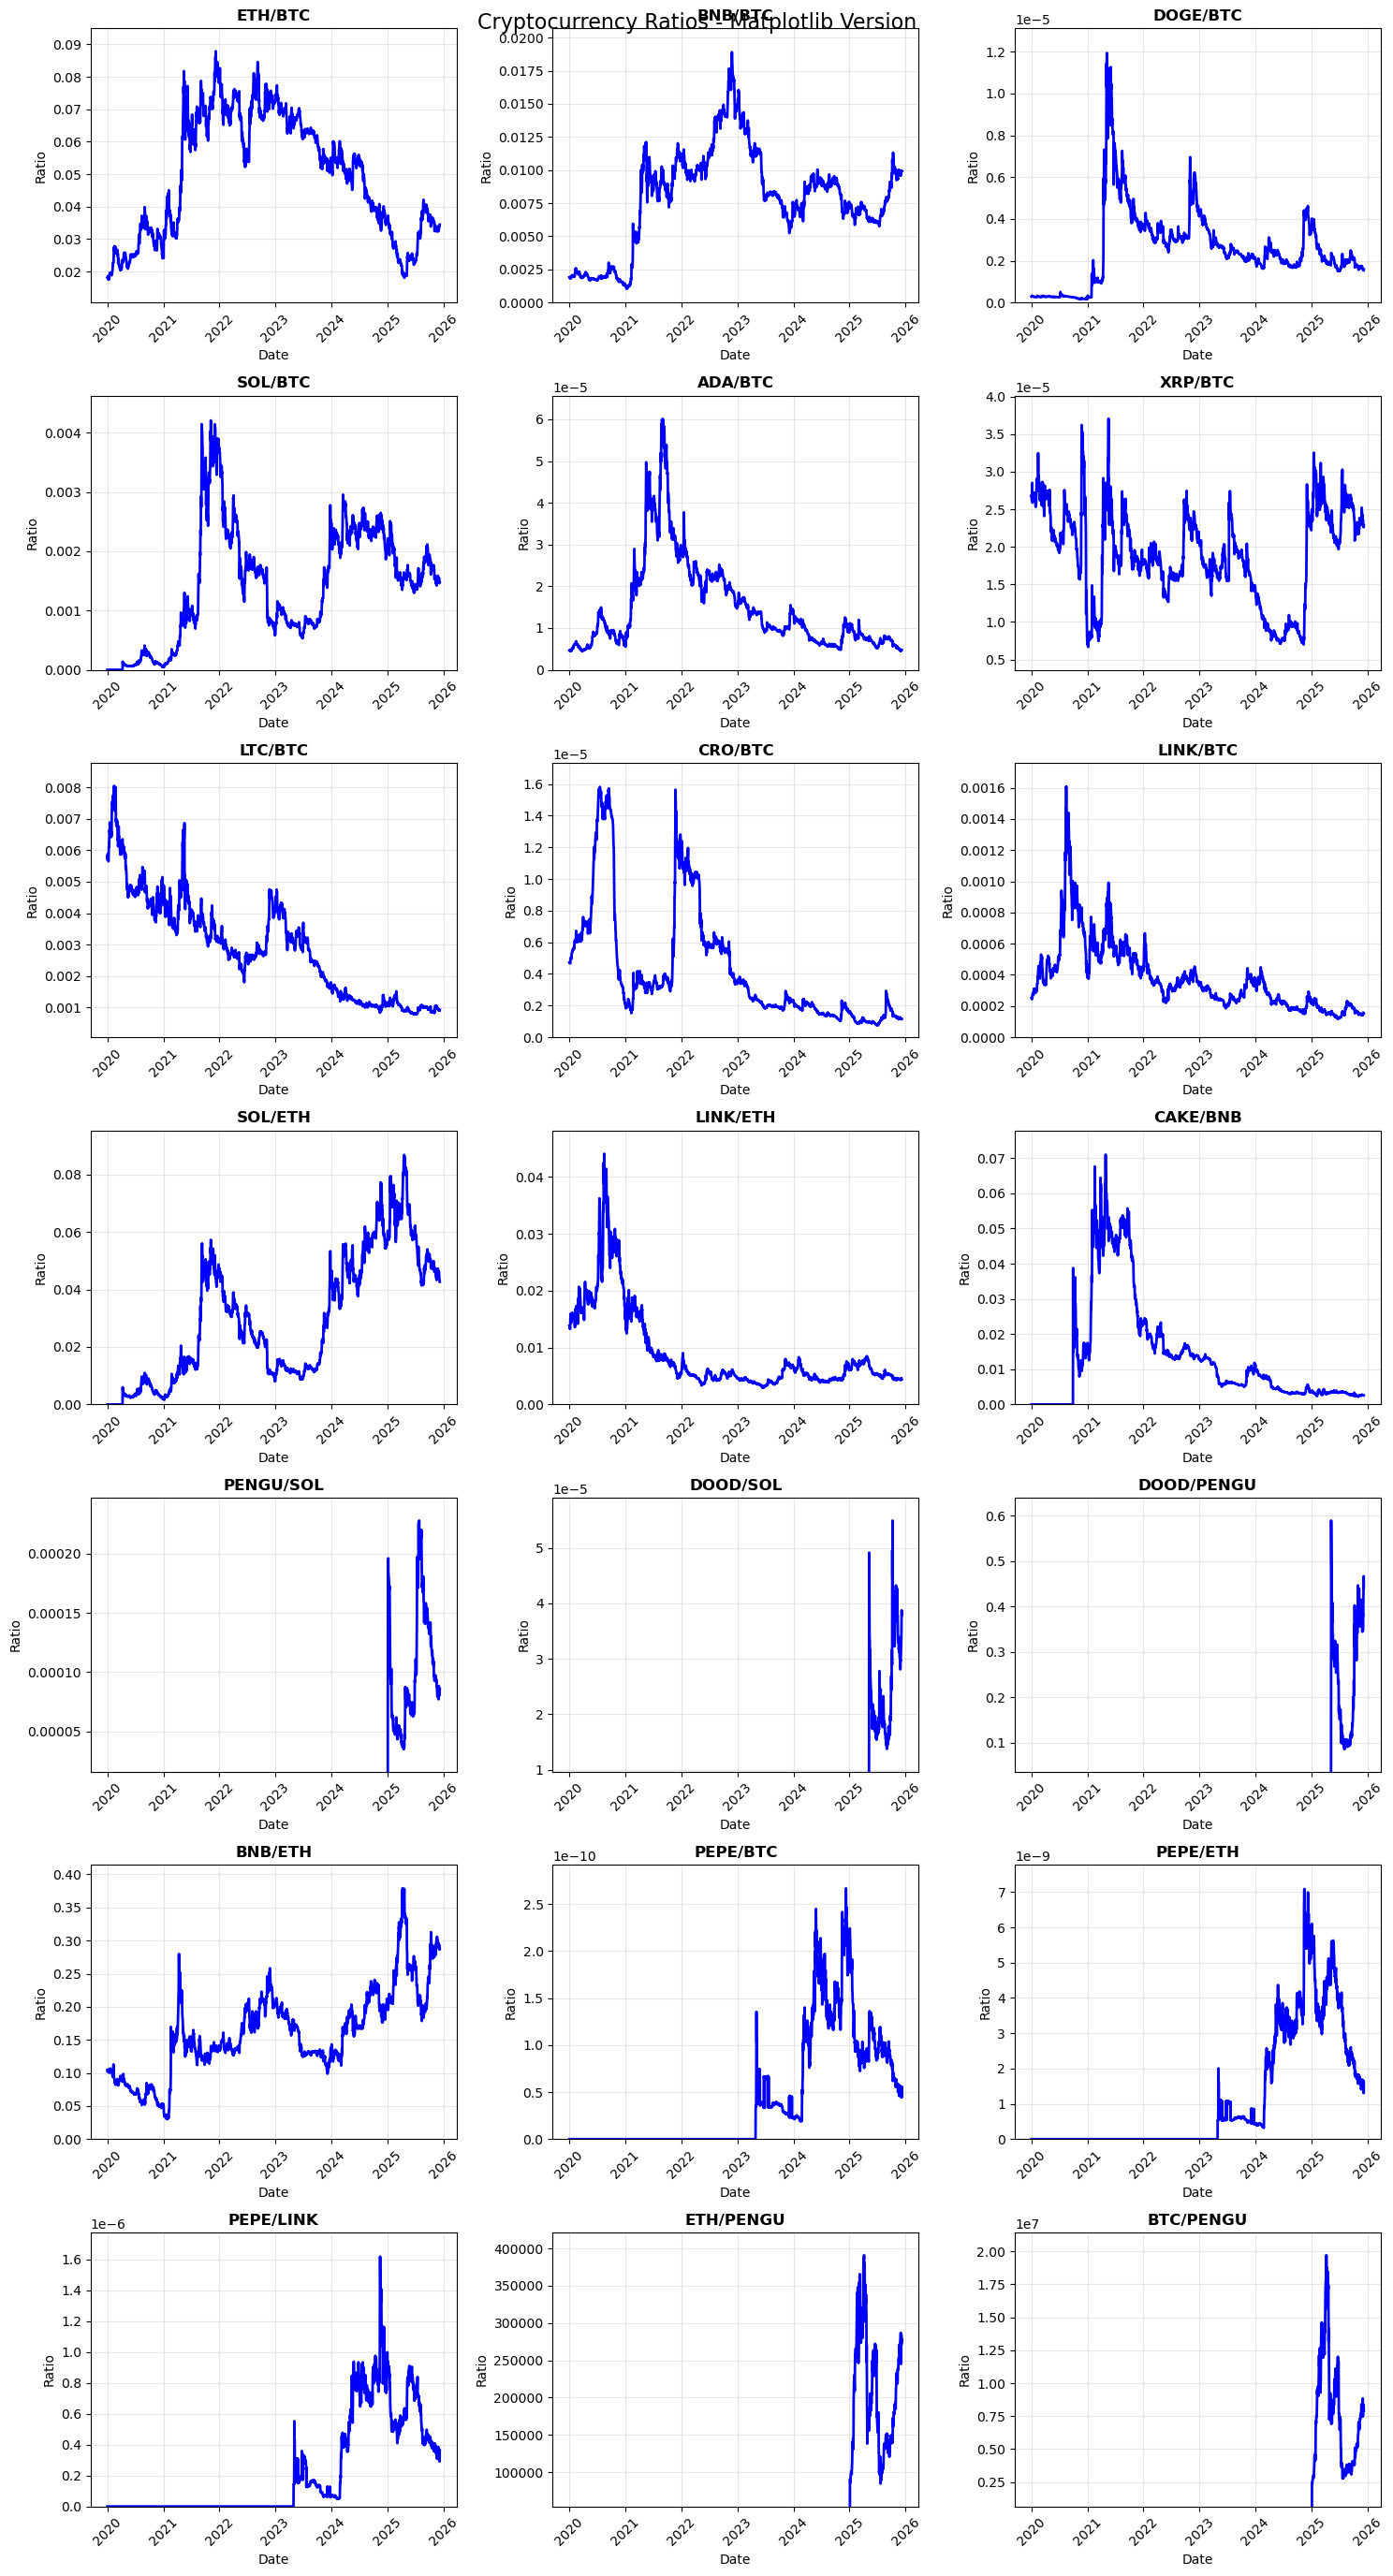


Cryptocurrency Ratios Summary Statistics:
   ETH/BTC: Mean=0.0495, Std=0.0187, Min=0.0175, Max=0.0879
   BNB/BTC: Mean=0.0079, Std=0.0037, Min=0.0010, Max=0.0189
  DOGE/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
   SOL/BTC: Mean=0.0015, Std=0.0010, Min=0.0000, Max=0.0042
   ADA/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0001
   XRP/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
   LTC/BTC: Mean=0.0029, Std=0.0016, Min=0.0008, Max=0.0080
   CRO/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
  LINK/BTC: Mean=0.0004, Std=0.0002, Min=0.0001, Max=0.0016
   SOL/ETH: Mean=0.0309, Std=0.0216, Min=0.0016, Max=0.0868
  LINK/ETH: Mean=0.0091, Std=0.0073, Min=0.0029, Max=0.0441
  CAKE/BNB: Mean=0.0153, Std=0.0153, Min=0.0022, Max=0.0710
 PENGU/SOL: Mean=0.0001, Std=0.0001, Min=0.0000, Max=0.0002
  DOOD/SOL: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0001
DOOD/PENGU: Mean=0.2404, Std=0.1234, Min=0.0866, Max=0.5890
   BNB/ETH: Mean=0.1609, Std=0.0652, Min=0.0301, Max=0.37

In [9]:
# Alternative matplotlib visualization of cryptocurrency ratios

# Create subplots using matplotlib
n_ratios = len(ratios_list)
n_cols = 3
n_rows = (n_ratios + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Cryptocurrency Ratios - Matplotlib Version', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot each ratio
for i, ratio in enumerate(ratios_list):
    if i < len(axes):
        axes[i].plot(ratios_df.index, ratios_df[ratio], linewidth=2, color='blue')
        axes[i].set_title(f'{ratio}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Ratio')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Remove zero values from y-axis display for better scaling
        non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
        if not non_zero_data.empty:
            y_min, y_max = non_zero_data.min(), non_zero_data.max()
            margin = (y_max - y_min) * 0.1
            axes[i].set_ylim(max(0, y_min - margin), y_max + margin)

# Hide any unused subplots
for i in range(len(ratios_list), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nCryptocurrency Ratios Summary Statistics:")
print("=" * 50)
for ratio in ratios_list:
    non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
    if not non_zero_data.empty:
        print(f"{ratio:>10}: Mean={non_zero_data.mean():.4f}, "
              f"Std={non_zero_data.std():.4f}, "
              f"Min={non_zero_data.min():.4f}, "
              f"Max={non_zero_data.max():.4f}")
    else:
        print(f"{ratio:>10}: No valid data available")

In [10]:
# ratios_2017_list
ratios_2017_list = ['ETH/BTC', 'DOGE/BTC','ADA/BTC', 'XRP/BTC', 'LTC/BTC']

[*********************100%***********************]  6 of 6 completed


Data loaded successfully. Date range: 2017-11-09 00:00:00 to 2025-12-13 00:00:00
Available cryptocurrencies: ['DOGE', 'XRP', 'BTC', 'ETH', 'ADA', 'LTC']
Calculated ratio: ETH/BTC
Calculated ratio: DOGE/BTC
Calculated ratio: ADA/BTC
Calculated ratio: XRP/BTC
Calculated ratio: LTC/BTC

Ratios calculated: ['ETH/BTC', 'DOGE/BTC', 'ADA/BTC', 'XRP/BTC', 'LTC/BTC']
Data points per ratio: 2957


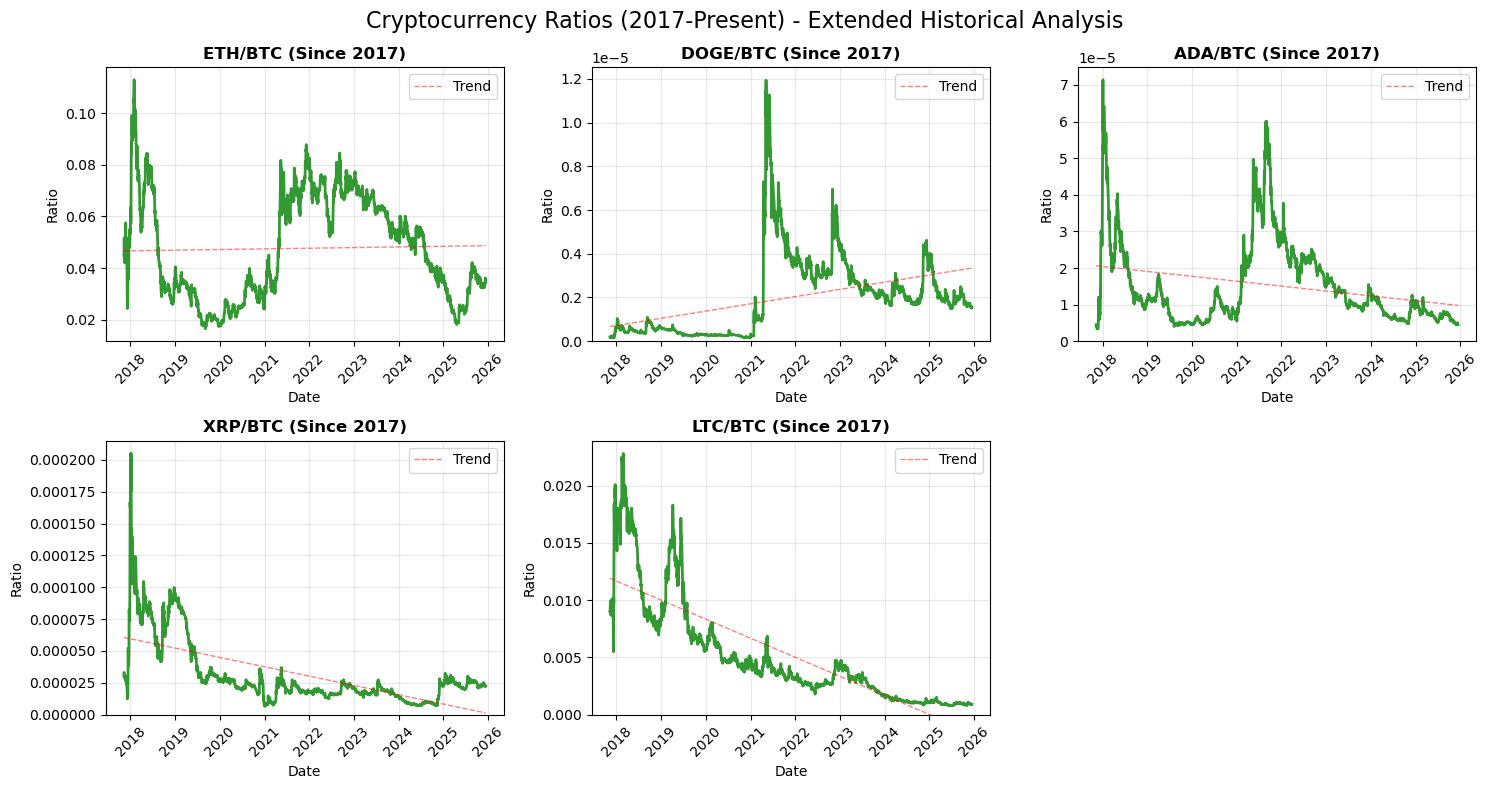


CRYPTOCURRENCY RATIOS EXTENDED ANALYSIS (2017-PRESENT)

ETH/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-12-13
  Data Points: 2957
  Mean Ratio: 0.0477
  Std Deviation: 0.0201
  Min Ratio: 0.0164 (on 2019-09-06)
  Max Ratio: 0.1131 (on 2018-02-01)
  Total Return: -23.16%
  Avg Yearly Return: 15.53%
  Volatility (Annualized): 0.3840

DOGE/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-12-13
  Data Points: 2957
  Mean Ratio: 0.0000
  Std Deviation: 0.0000
  Min Ratio: 0.0000 (on 2017-12-07)
  Max Ratio: 0.0000 (on 2021-05-07)
  Total Return: 678.06%
  Avg Yearly Return: 243.79%
  Volatility (Annualized): 0.0000

ADA/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-12-13
  Data Points: 2957
  Mean Ratio: 0.0000
  Std Deviation: 0.0000
  Min Ratio: 0.0000 (on 2017-11-17)
  Max Ratio: 0.0001 (on 2018-01-04)
  Total Return: 1.45%
  Avg Yearly Return: 151.57%
  Volatility (Annualized): 0.0002

XRP/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-12-13
  Data Points: 2957
  Mean Ratio: 

In [11]:
# Extended analysis: Cryptocurrency ratios from 2017 using matplotlib
import yfinance as yf

# Download data from 2017 for selected ratios
start_date_2017 = "2017-01-01"
end_date_2017 = datetime.now().strftime("%Y-%m-%d")

# Cryptocurrencies available from 2017
crypto_2017 = ['ETH-USD', 'BTC-USD', 'DOGE-USD', 'ADA-USD', 'XRP-USD', 'LTC-USD']

print("Downloading historical data from 2017...")
data_2017 = yf.download(crypto_2017, start=start_date_2017, end=end_date_2017, group_by='ticker')

# Process the 2017 data
df_2017 = data_2017.copy()

# Convert to MultiIndex format if needed
if isinstance(df_2017.columns, pd.MultiIndex):
    # Rename tickers to cleaner names
    df_2017.columns = pd.MultiIndex.from_tuples([
        (
            col[0].replace('ETH-USD', 'ETH').replace('BTC-USD', 'BTC').replace('DOGE-USD', 'DOGE').replace('ADA-USD', 'ADA').replace('XRP-USD', 'XRP').replace('LTC-USD', 'LTC'),
            col[1]
        ) for col in df_2017.columns
    ])
    
    # Keep only 'Close' prices
    close_prices_2017 = df_2017.xs('Close', level=1, axis=1)
else:
    # Handle single asset case
    close_prices_2017 = df_2017[['Close']].copy()

# Ensure datetime index
close_prices_2017.index = pd.to_datetime(close_prices_2017.index)

# Forward fill missing values
close_prices_2017 = close_prices_2017.fillna(method='ffill').dropna()

print(f"Data loaded successfully. Date range: {close_prices_2017.index.min()} to {close_prices_2017.index.max()}")
print(f"Available cryptocurrencies: {list(close_prices_2017.columns)}")

# Calculate ratios for 2017 data
ratios_df_2017 = pd.DataFrame(index=close_prices_2017.index)

# Calculate the price ratios for each pair in the 2017 ratios list
for pair in ratios_2017_list:
    base, quote = pair.split('/')
    if base in close_prices_2017.columns and quote in close_prices_2017.columns:
        ratios_df_2017[pair] = close_prices_2017[base] / close_prices_2017[quote]
        print(f"Calculated ratio: {pair}")
    else:
        print(f"Skipping {pair} - missing data for {base} or {quote}")

# Remove any remaining NaN values
ratios_df_2017 = ratios_df_2017.dropna()

print(f"\nRatios calculated: {list(ratios_df_2017.columns)}")
print(f"Data points per ratio: {len(ratios_df_2017)}")

# Create matplotlib visualization for 2017 data
n_ratios_2017 = len(ratios_df_2017.columns)
n_cols = 3
n_rows = (n_ratios_2017 + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Cryptocurrency Ratios (2017-Present) - Extended Historical Analysis', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot each ratio from 2017
for i, ratio in enumerate(ratios_df_2017.columns):
    if i < len(axes):
        axes[i].plot(ratios_df_2017.index, ratios_df_2017[ratio], linewidth=2, color='green', alpha=0.8)
        axes[i].set_title(f'{ratio} (Since 2017)', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Ratio')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Improve y-axis scaling
        y_min, y_max = ratios_df_2017[ratio].min(), ratios_df_2017[ratio].max()
        margin = (y_max - y_min) * 0.05
        axes[i].set_ylim(max(0, y_min - margin), y_max + margin)
        
        # Add trend line
        x_numeric = np.arange(len(ratios_df_2017))
        z = np.polyfit(x_numeric, ratios_df_2017[ratio], 1)
        p = np.poly1d(z)
        axes[i].plot(ratios_df_2017.index, p(x_numeric), "r--", alpha=0.5, linewidth=1, label='Trend')
        axes[i].legend()

# Hide any unused subplots
for i in range(n_ratios_2017, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Extended summary statistics for 2017 data
print("\n" + "="*70)
print("CRYPTOCURRENCY RATIOS EXTENDED ANALYSIS (2017-PRESENT)")
print("="*70)

for ratio in ratios_df_2017.columns:
    data = ratios_df_2017[ratio]
    
    # Calculate additional statistics
    start_value = data.iloc[0]
    end_value = data.iloc[-1]
    total_return = ((end_value - start_value) / start_value) * 100
    
    # Calculate yearly returns
    years = data.index.year.unique()
    yearly_returns = []
    for year in sorted(years)[:-1]:  # Exclude current incomplete year
        year_start = data[data.index.year == year].iloc[0]
        year_end = data[data.index.year == year].iloc[-1]
        yearly_return = ((year_end - year_start) / year_start) * 100
        yearly_returns.append(yearly_return)
    
    avg_yearly_return = np.mean(yearly_returns) if yearly_returns else 0
    
    print(f"\n{ratio} ANALYSIS:")
    print(f"  Total Period: {data.index.min().strftime('%Y-%m-%d')} to {data.index.max().strftime('%Y-%m-%d')}")
    print(f"  Data Points: {len(data)}")
    print(f"  Mean Ratio: {data.mean():.4f}")
    print(f"  Std Deviation: {data.std():.4f}")
    print(f"  Min Ratio: {data.min():.4f} (on {data.idxmin().strftime('%Y-%m-%d')})")
    print(f"  Max Ratio: {data.max():.4f} (on {data.idxmax().strftime('%Y-%m-%d')})")
    print(f"  Total Return: {total_return:.2f}%")
    print(f"  Avg Yearly Return: {avg_yearly_return:.2f}%")
    print(f"  Volatility (Annualized): {data.std() * np.sqrt(365):.4f}")

# Market cycle analysis
print(f"\n" + "="*50)
print("MARKET CYCLE INSIGHTS")
print("="*50)

# Find major bull/bear periods for ETH/BTC if available
if 'ETH/BTC' in ratios_df_2017.columns:
    eth_btc = ratios_df_2017['ETH/BTC']
    
    # Find significant peaks and troughs
    rolling_max = eth_btc.rolling(window=90).max()
    rolling_min = eth_btc.rolling(window=90).min()
    
    # Major peaks (local maxima)
    peaks = eth_btc[(eth_btc == rolling_max) & (eth_btc > eth_btc.quantile(0.8))]
    troughs = eth_btc[(eth_btc == rolling_min) & (eth_btc < eth_btc.quantile(0.2))]
    
    print(f"ETH/BTC CYCLE ANALYSIS:")
    print(f"  Major Peaks ({len(peaks)}):")
    for date, value in peaks.head(5).items():
        print(f"    {date.strftime('%Y-%m-%d')}: {value:.4f}")
    
    print(f"  Major Troughs ({len(troughs)}):")
    for date, value in troughs.head(5).items():
        print(f"    {date.strftime('%Y-%m-%d')}: {value:.4f}")

print(f"\nAnalysis completed for {len(ratios_df_2017.columns)} cryptocurrency ratios from 2017 to present.")
print("This extended historical view provides insights into long-term crypto market evolution.")